In [78]:
import pandas as pd
import ast
import os
import numpy as np
from tqdm.notebook import tqdm

In [66]:
df1 = pd.read_csv("../../file under test for waveform/dale('obj_rel_across_anim.pickle', 'sing_MS_MV_plur_ES_EV').csv")
df2 = pd.read_csv("../../file under test for waveform/nodale('obj_rel_across_anim.pickle', 'sing_MS_MV_plur_ES_EV').csv")
df3 = pd.read_csv("../../file under test for waveform/lstm('obj_rel_across_anim.pickle', 'sing_MS_MV_plur_ES_EV') (1).csv")

In [67]:
df1 = df1.to_dict()
df2 = df2.to_dict()
df3 =df3.to_dict()

In [14]:
df1.keys()

dict_keys(['Unnamed: 0', 'Input sentence', 'Correct output', 'Time stamp outputs'])

In [12]:
total_sentences = len(df1["Input sentence"].keys())

In [80]:
def draw_waveform_and_save(index, df1, df2, df3, path=None):
    sentence = df1["Input sentence"][index].split()
    l1 = ast.literal_eval(df1["Time stamp outputs"][index])
    l2 = ast.literal_eval(df2["Time stamp outputs"][index])
    l3 = ast.literal_eval(df3["Time stamp outputs"][index])
    for i in range(len(sentence)):
        sentence[i]=sentence[i]+"_"+str(i)
#     print(l1)
#     print(l2)
#     print(l3)
#     print(sentence)
    plt.plot(sentence, l1, label="dale")
    plt.plot(sentence, l2, label="nodale")
    plt.plot(sentence, l3, label="lstm")
    plt.legend(loc="upper left")
    if path==None:
        plt.show()
    else:
        plt.savefig(os.path.join(path, str(index)))
        plt.close()

In [81]:
root="../../pvn comparison for obj rel across anim sing_plur/"
count=0
for i in tqdm(range(total_sentences)):
    l1 = np.asarray(ast.literal_eval(df1["Time stamp outputs"][i]))
    l2 = np.asarray(ast.literal_eval(df2["Time stamp outputs"][i]))
    l3 = np.asarray(ast.literal_eval(df3["Time stamp outputs"][i]))
    if np.sum(l1!=l2)!=0 or np.sum(l3!=l2)!=0 or np.sum(l1!=l3)!=0:
        # now we need to draw a waveform. 
        draw_waveform_and_save(i, df1, df2, df3, path=root)
    else:
        count+=1

In [82]:
count

70

In [44]:
l1 = ast.literal_eval(df1["Time stamp outputs"][0])
l2 = ast.literal_eval(df2["Time stamp outputs"][0])

In [33]:
import matplotlib.pyplot as plt

[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
['the_0', 'senator_1', 'that_2', 'the_3', 'dancers_4', 'hate_5', 'is_6', 'tall_7']


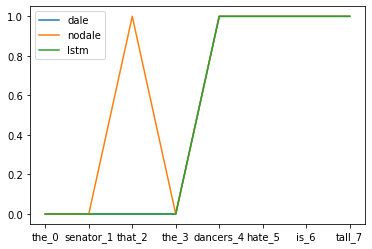

In [73]:
draw_waveform_and_save(700, df1, df2, df3)